@ point processing, 
- linear blending, linear operations(constrast )
@ neibourhood operator

## Gamma

> In the early days, the relationship between the voltage and the resulting brightness was characterized by $\gamma$, since
the formula was roughly $B = V^\gamma$ where gamma is about $2.2$. To compensate for this effect, the electronics in the TV camera would pre-map the sensed luminance Y through an inverse gamma $Y' = Y^{\frac{1}{\gamma}}$ with a typical value of $\frac{1}{\gamma} = 0.45$. This is so-called __Gamma Correlation__. One of the side effects is that noise introduced during transmission is squashed in the dark regions, which corresponds to the more noise-sensitive region of the visual system.

In [1]:
import cv2

In [2]:
import numpy as np

In [80]:
img = cv2.imread('dataset/Orgrimmar.jpg')

In [4]:
from matplotlib import pyplot as plt

<img src="dataset/Orgrimmar.jpg" alt="Orgrimmar" style="width: 600px;"/>

A useful api to deal with gamma_adjusting is 
- `cv2.LUT(src, lut[, dst[, interpolation]])`
which means that for an int8 array, a look-up table transformation will be given.

In [15]:
# Create the look up table
lut = lambda gamma = 2.2: np.uint8([ (i/ 255.0) ** (1/gamma) * 255 for i in range(256)])

(-0.5, 1919.5, 1079.5, -0.5)

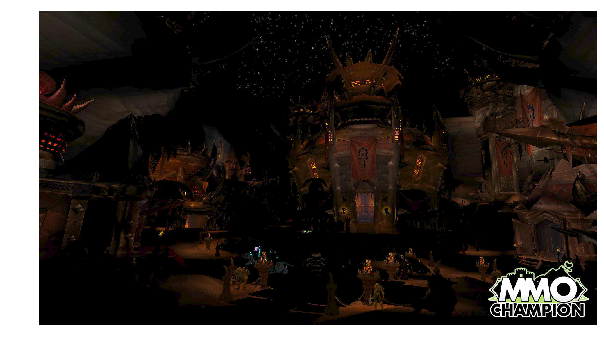

In [24]:
adjusted = cv2.LUT(img.astype(np.uint8), lut(1.8))
f, axis = plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(cv2.cvtColor(adjusted.astype(np.uint8), cv2.COLOR_BGR2RGB))
axis.axis("off")

#### Exercise: Random Lighting

In [98]:
def random_lighting(img, intensity = 50):
    temp = img.copy()
    value = np.random.randint(intensity * -1, intensity, size=(3,))
    b, g, r = cv2.split(img)

    if value[0] < 0: 
        lim = - value[0]
        b[ b <= lim] = 0
        b[ b > lim] = b[ b > lim] + value[0]
    elif value[0] > 0:
        lim = 255 - value[0]
        b[ b >= lim] = 255
        b[ b < lim] = b[ b < lim] + value[0]
        
    if value[1] < 0: 
        lim = - value[1]
        g[ g <= lim] = 0
        g[ g > lim] = g[ g > lim] + value[1]
    elif value[1] > 0:
        lim = 255 - value[1]
        g[ g >= lim] = 255
        g[ g < lim] = g[ g < lim] + value[1]
    
    if value[2] < 0: 
        lim = - value[2]
        r[ r <= lim] = 0
        r[ r > lim] = r[ r > lim] + value[2]
    elif value[2] > 0:
        lim = 255 - value[2]
        r[ r >= lim] = 255
        r[ r < lim] = r[ r < lim] + value[2]
        
    return cv2.merge((b, g, r))

(-0.5, 1919.5, 1079.5, -0.5)

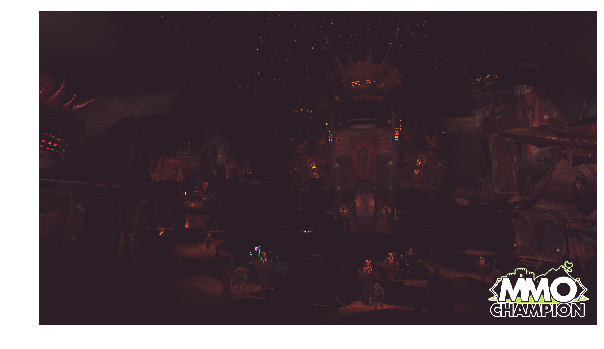

In [103]:
f, axis = plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(cv2.cvtColor(random_lighting(img).astype(np.uint8), cv2.COLOR_BGR2RGB))
axis.axis("off")

#### EqualizeHist